## Amazon Product Recommendation System

The goal of this project is to build a robust Amazon product recommendation system based on explicit feedback. By blending content-based and collaborative approaches, the system aims to deliver highly personalized and relevant product suggestions, enhancing the Amazon shopping experience.

## Data Wrangling

**Let's first import the necessary packages to properly data wrangle and load the data downloaded from kaggle**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords


#pd.set_option('display.max_rows', None)  # Display all rows
amazon_data = pd.read_csv("C:/Users/johnc/GitHub/Amazon-Product-Recommendation-System/amazon.csv")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Converting dtypes & Dropping Null Values

In [7]:
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [8]:
amazon_data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

We see that some columns that contains numbers with some characters should not be strings so lets fix that

In [9]:
#Here I am removing any unnecessary characters that are in certain columns which cause me to
#not be able to transform the data into int/float
amazon_data['rating_count'] = amazon_data['rating_count'].str.replace(',', '')
amazon_data['discount_percentage'] = amazon_data["discount_percentage"].str.replace('%', '')
amazon_data["actual_price"] = amazon_data["actual_price"].str.replace(',', "")
amazon_data["actual_price"] = amazon_data["actual_price"].str.replace('₹', "")
amazon_data["discounted_price"] = amazon_data["discounted_price"].str.replace(',', "")
amazon_data["discounted_price"] = amazon_data["discounted_price"].str.replace('₹', "")
amazon_data["rating"] = amazon_data["rating"].str.replace("|", "")

Not lets convert these columns into their correct dtype

In [10]:
amazon_data["rating_count"] = amazon_data["rating_count"].fillna(0).astype('int64')
#There are only null values in the "rating_count" column so I had to fill it with zero 0 assuming 
#it is Nan because of that reason
amazon_data["discount_percentage"] = amazon_data["discount_percentage"].astype("int64")
amazon_data["actual_price"] = amazon_data["actual_price"].astype("float")
amazon_data["discounted_price"] = amazon_data["discounted_price"].astype("float")
amazon_data["rating"] = pd.to_numeric(amazon_data['rating'], errors='coerce')

Now lets look at summary of the data

In [11]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1465 non-null   int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Let's see if there are any Null values still

In [12]:
amazon_data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

It seems like there is so let's just replace the rating with it's actual rating from sourcing on the product link

In [13]:
pd.options.display.max_colwidth=100000
amazon_data[amazon_data['rating'].isnull() == True]['product_link']


1279    https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1/ref=sr_1_295?qid=1672923607&s=kitchen&sr=1-295
Name: product_link, dtype: object

In [14]:
amazon_data[amazon_data['rating'].isnull() == True] = 3.9

C:\Users\johnc\AppData\Local\Temp\ipykernel_27608\806006778.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  amazon_data[amazon_data['rating'].isnull() == True] = 3.9
C:\Users\johnc\AppData\Local\Temp\ipykernel_27608\806006778.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  amazon_data[amazon_data['rating'].isnull() == True] = 3.9


Now lets see if there are any Null values still

In [15]:
amazon_data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Now let's check if there is any values out of the ordinary like something being outside of the normal range for all the columns. 

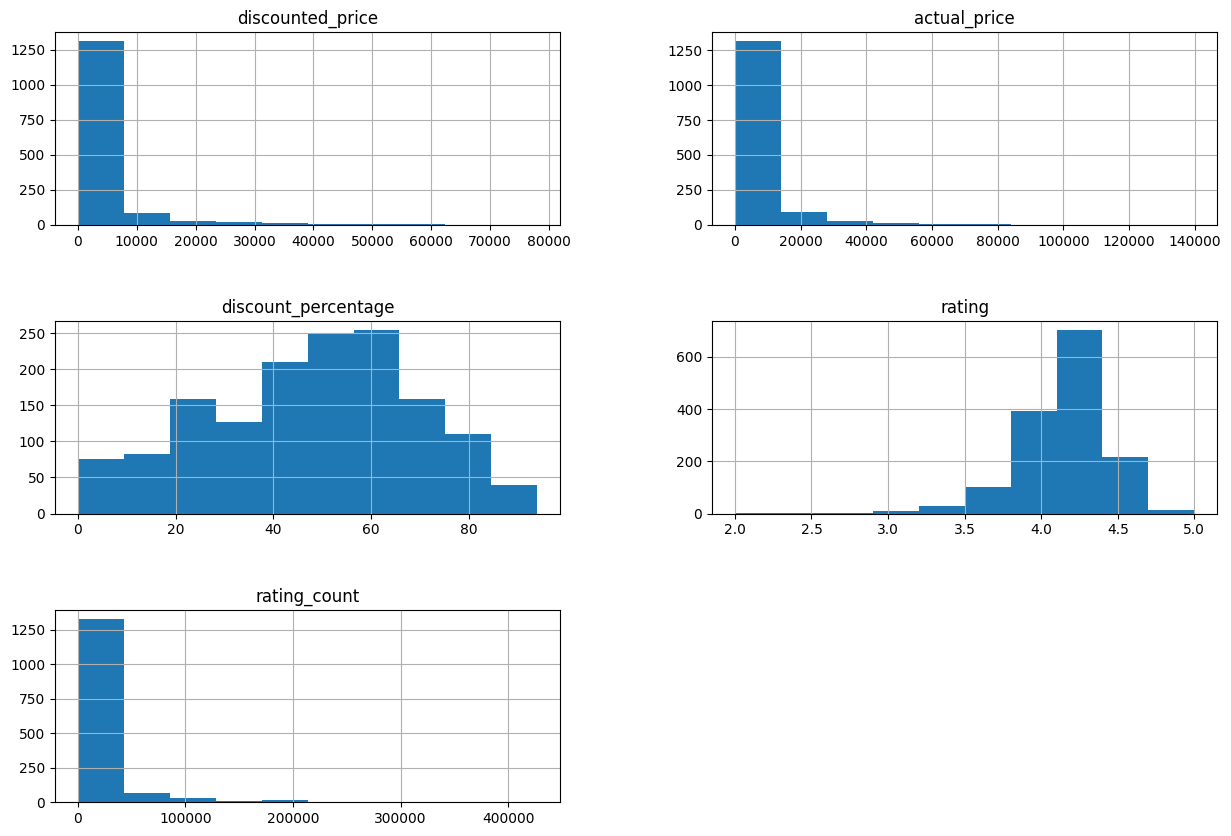

In [16]:
amazon_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=.5);

As we can see, no data points seems out of the ordinary when checking for data points way out of range

----------------------------------------------------------------------------------

## Deleting Duplicates

Now lets see if there are any duplicates in out dataset by checking product_id

In [17]:
#Here we are dropping all the duplicates of "product_id" by the subsetting the data
#set to only have the data where "duplicates" is equal to False
duplicates = amazon_data.duplicated(subset=['product_id'], keep='last')
amazon_data = amazon_data[duplicates == False]

Let's assert whether we got rid of all the duplicates of "product_id"

In [18]:
duplicates = amazon_data.duplicated(subset=['product_id'], keep=False)
duplicate_rows = amazon_data[duplicates == True].sort_values(by='product_id')
assert duplicate_rows.shape[0] == 0

In [19]:
pd.options.display.max_colwidth=50
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
16,B0B6F7LX4C,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,"Note : The brands, Mi and Xiaomi, are part of ...","AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",It is the best tv if you are getting it in 10-...,Pros- xiomi 5a is best in budget-Nice picture ...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
24,B0B1YVCJ2Y,Acer 80 cm (32 inches) I Series HD Ready Andro...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,Resolution : HD Ready (1366x768) | Refresh Rat...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",Wonderful TV and Awful installation service fr...,About the TV - Wonderful----------------------...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...
26,B08B42LWKN,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,Resolution: HD Ready (1366x768) | Refresh Rate...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...","Worthy and most affordable - Great TV,Good pro...",This OnePlus TV is great if you want a afforda...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...
38,B0B3MMYHYW,OnePlus 126 cm (50 inches) Y Series 4K Ultra H...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,Resolution: 4K Ultra HD (3840x2160) | Bezel-le...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...","Decent product. Value for money.,Value for mon...",I am posting this after a few weeks of using t...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...


## Cleaning and Preprocessing the text

Here we see that there are quite a few different columns where the text has a lot of punctuation errors, capitlization, and random characters in between the texts and what not. So let's fix this 

When processing text, we have to reduce it to its simplest form because there is so much text, that it makes it hard to process data in NLP. So we have to reduce words that are not necessary, punctuation that is useles, and words in lowercase so we can have consistent data for later when we are doing sentiment analysis for our recommendation system. 

Let's create a function that can:
- Lowercase
- Remove punctuation & special characters
- Eliminating stop words

In [20]:
def clean_text(s):
    s = s.lower() #Lowercase
    s = re.sub(r'[^a-zA-Z0-9\s]', '', s)#Removing punctuation
    stop_words = set(stopwords.words('english')) 
    s = ' '.join([word for word in s.split() if word not in stop_words]) 
    #Removing stop words & then joinging them together
    return s

amazon_data["product_name"] = amazon_data["product_name"].astype('str').apply(clean_text)
amazon_data['about_product'] = amazon_data['about_product'].astype('str').apply(clean_text)
amazon_data['review_content'] = amazon_data['review_content'].astype('str').apply(clean_text)
amazon_data['review_title'] = amazon_data['review_title'].astype('str').apply(clean_text)

In [21]:
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
8,B008IFXQFU,tplink usb wifi adapter pctlwn725n n150 wirele...,Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,50.0,4.2,179691.0,usb wifi adapter speedy wireless transmission ...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",works linux get model antennadoes say brands a...,use connect old pc internet tried lubuntu 20 u...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
16,B0B6F7LX4C,mi 80 cm 32 inches 5a series hd ready smart an...,"Electronics|HomeTheater,TV&Video|Televisions|S...",13999.0,24999.0,44.0,4.2,32840.0,note brands mi xiaomi part multinational congl...,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",best tv getting 1012kgood price os lagsgarbage...,pros xiomi 5a best budgetnice picture qualityv...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
24,B0B1YVCJ2Y,acer 80 cm 32 inches series hd ready android s...,"Electronics|HomeTheater,TV&Video|Televisions|S...",11499.0,19990.0,42.0,4.3,4703.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",wonderful tv awful installation service amazon...,tv wonderfulprobably best tv price range inr13...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...
26,B08B42LWKN,oneplus 80 cm 32 inches series hd ready led sm...,"Electronics|HomeTheater,TV&Video|Televisions|S...",14999.0,19999.0,25.0,4.2,34899.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...",worthy affordable great tvgood productits real...,oneplus tv great want affordable middle range ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...
38,B0B3MMYHYW,oneplus 126 cm 50 inches series 4k ultra hd sm...,"Electronics|HomeTheater,TV&Video|Televisions|S...",32999.0,45999.0,28.0,4.2,7298.0,resolution 4k ultra hd 3840x2160 bezelless des...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...",decent product value moneyvalue moneyimproveme...,posting weeks using productusage continuous ot...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...


You can see that we didn't clean the text for the "category" column. This is because they have a hierarchial structure because it is used to organize products exactly how they have it on the Amazon website. For us and our analysis, we do not need the heirarchical structure, so we are going to take the broadest category of each product and make it the category. And then after, we are going to clean the text.

In [22]:
amazon_data["category"] = amazon_data["category"].astype('str').apply(lambda x: x.split("|")[0])
amazon_data["category"] = amazon_data["category"].apply(clean_text)
amazon_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
8,B008IFXQFU,tplink usb wifi adapter pctlwn725n n150 wirele...,computersaccessories,499.0,999.0,50.0,4.2,179691.0,usb wifi adapter speedy wireless transmission ...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",works linux get model antennadoes say brands a...,use connect old pc internet tried lubuntu 20 u...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
16,B0B6F7LX4C,mi 80 cm 32 inches 5a series hd ready smart an...,electronics,13999.0,24999.0,44.0,4.2,32840.0,note brands mi xiaomi part multinational congl...,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",best tv getting 1012kgood price os lagsgarbage...,pros xiomi 5a best budgetnice picture qualityv...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
24,B0B1YVCJ2Y,acer 80 cm 32 inches series hd ready android s...,electronics,11499.0,19990.0,42.0,4.3,4703.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",wonderful tv awful installation service amazon...,tv wonderfulprobably best tv price range inr13...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...
26,B08B42LWKN,oneplus 80 cm 32 inches series hd ready led sm...,electronics,14999.0,19999.0,25.0,4.2,34899.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...",worthy affordable great tvgood productits real...,oneplus tv great want affordable middle range ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...
38,B0B3MMYHYW,oneplus 126 cm 50 inches series 4k ultra hd sm...,electronics,32999.0,45999.0,28.0,4.2,7298.0,resolution 4k ultra hd 3840x2160 bezelless des...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...",decent product value moneyvalue moneyimproveme...,posting weeks using productusage continuous ot...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...


## Exploratory Data Analysis

Let's look at all the features and see how they correlate with each other, and try to find a bigger picture with product relationship with their respective qualities. One thing I want to check in particular is the category, and how it relates to price. 

In [23]:
amazon_data['category'].unique()

array(['computersaccessories', 'electronics', 'musicalinstruments',
       'officeproducts', 'homekitchen', 'homeimprovement', 'toysgames',
       'carmotorbike', 'healthpersonalcare', '39'], dtype=object)

In [24]:
drop_index = amazon_data[amazon_data['category'] == '39']
amazon_data.drop(drop_index.index).head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
8,B008IFXQFU,tplink usb wifi adapter pctlwn725n n150 wirele...,computersaccessories,499.0,999.0,50.0,4.2,179691.0,usb wifi adapter speedy wireless transmission ...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",works linux get model antennadoes say brands a...,use connect old pc internet tried lubuntu 20 u...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
16,B0B6F7LX4C,mi 80 cm 32 inches 5a series hd ready smart an...,electronics,13999.0,24999.0,44.0,4.2,32840.0,note brands mi xiaomi part multinational congl...,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...","R13UTIA6KOF6QV,R2UGDZSGFF01K7,RHHIZ45VYU5X6,R1...",best tv getting 1012kgood price os lagsgarbage...,pros xiomi 5a best budgetnice picture qualityv...,https://m.media-amazon.com/images/I/51fmHk3km+...,https://www.amazon.in/MI-inches-Ready-Android-...
24,B0B1YVCJ2Y,acer 80 cm 32 inches series hd ready android s...,electronics,11499.0,19990.0,42.0,4.3,4703.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...","R1EBS3566VCSCG,R24MB66WRPSN2A,R25UU2M1B9BO5X,R...",wonderful tv awful installation service amazon...,tv wonderfulprobably best tv price range inr13...,https://m.media-amazon.com/images/I/41gikeSuhA...,https://www.amazon.in/Acer-inches-Ready-Androi...
26,B08B42LWKN,oneplus 80 cm 32 inches series hd ready led sm...,electronics,14999.0,19999.0,25.0,4.2,34899.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...","R3COVVOP2R7Z28,R2T6WHEO2ONNDD,RUFFV2QR43OCM,R2...",worthy affordable great tvgood productits real...,oneplus tv great want affordable middle range ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/OnePlus-inches-Ready-And...
38,B0B3MMYHYW,oneplus 126 cm 50 inches series 4k ultra hd sm...,electronics,32999.0,45999.0,28.0,4.2,7298.0,resolution 4k ultra hd 3840x2160 bezelless des...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...","R2J3Q3BUHJ2S7E,R2H2ELE1DG24VY,R1U1S7X7BPSZBU,R...",decent product value moneyvalue moneyimproveme...,posting weeks using productusage continuous ot...,https://m.media-amazon.com/images/I/51hQfTroMz...,https://www.amazon.in/OnePlus-50-inches-Androi...


C:\Users\johnc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


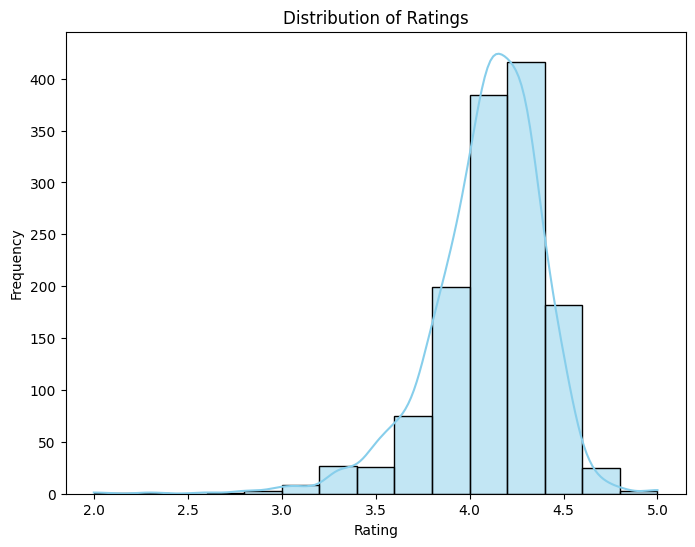

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(amazon_data['rating'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

As we can see the most common distribution is around 4.3 to 4.4

Let's see which categories tend to have higher ratings with boxplots

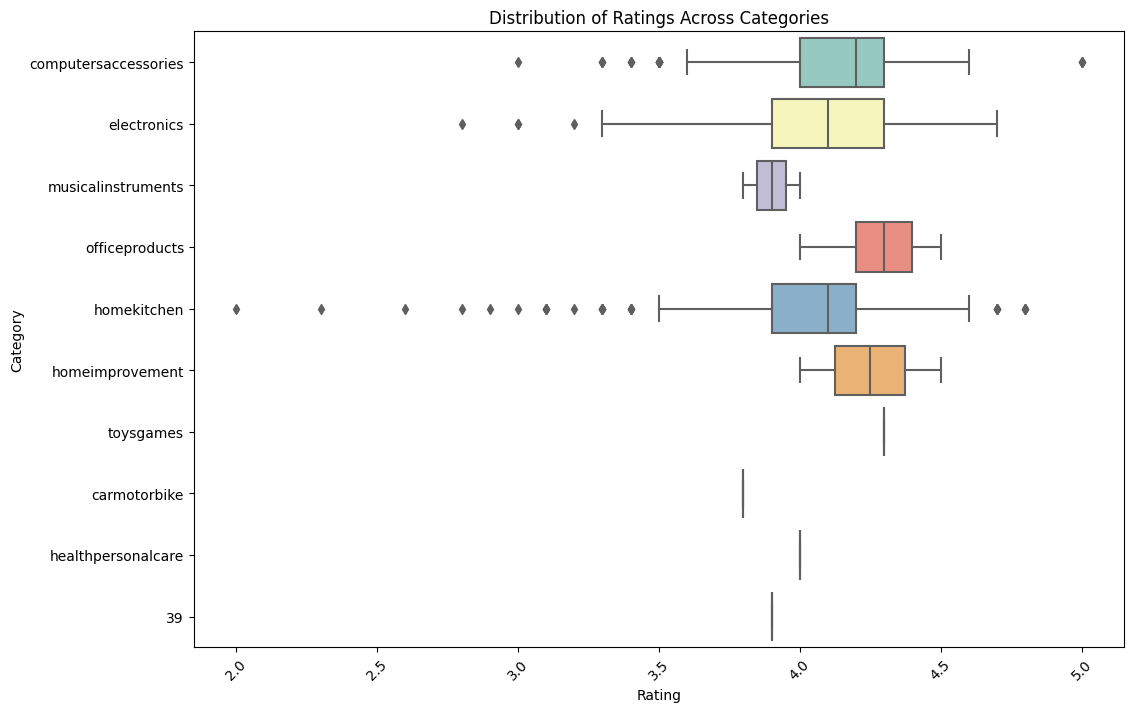

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='category', data=amazon_data, palette='Set3')
plt.title('Distribution of Ratings Across Categories')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

As we can see that the category with the highest most common rating is the office products and it has the smallest range meaning that office products are most likely to recieve the best feedback, at least from this graph at least.

Now lets see how many products are in their respective categories

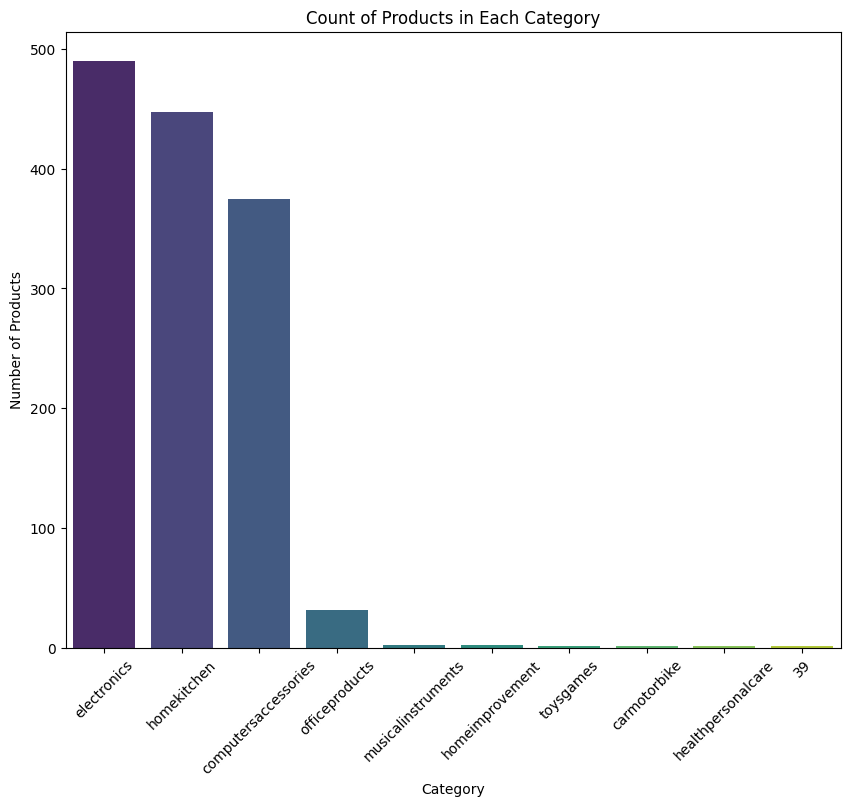

In [27]:
plt.figure(figsize=(10, 8))
category_counts = amazon_data['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Count of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

We can see that within amazon, from our sample pool of data that that there tends to be more electronics selling on amazon than anything else, so we can see that the office products ratings came from a smaller pool. Yet the electronics category despite having more samples, doesn't fall behind officeproducts in ratings in respect to the boxplot. 

Now let's analyze the relationship between rating, and the actual price

C:\Users\johnc\AppData\Local\Temp\ipykernel_27608\1137911322.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='actual_price', y='rating', size='rating_count', legend=True, data=amazon_data, alpha=0.6, edgecolor=None, palette='coolwarm')


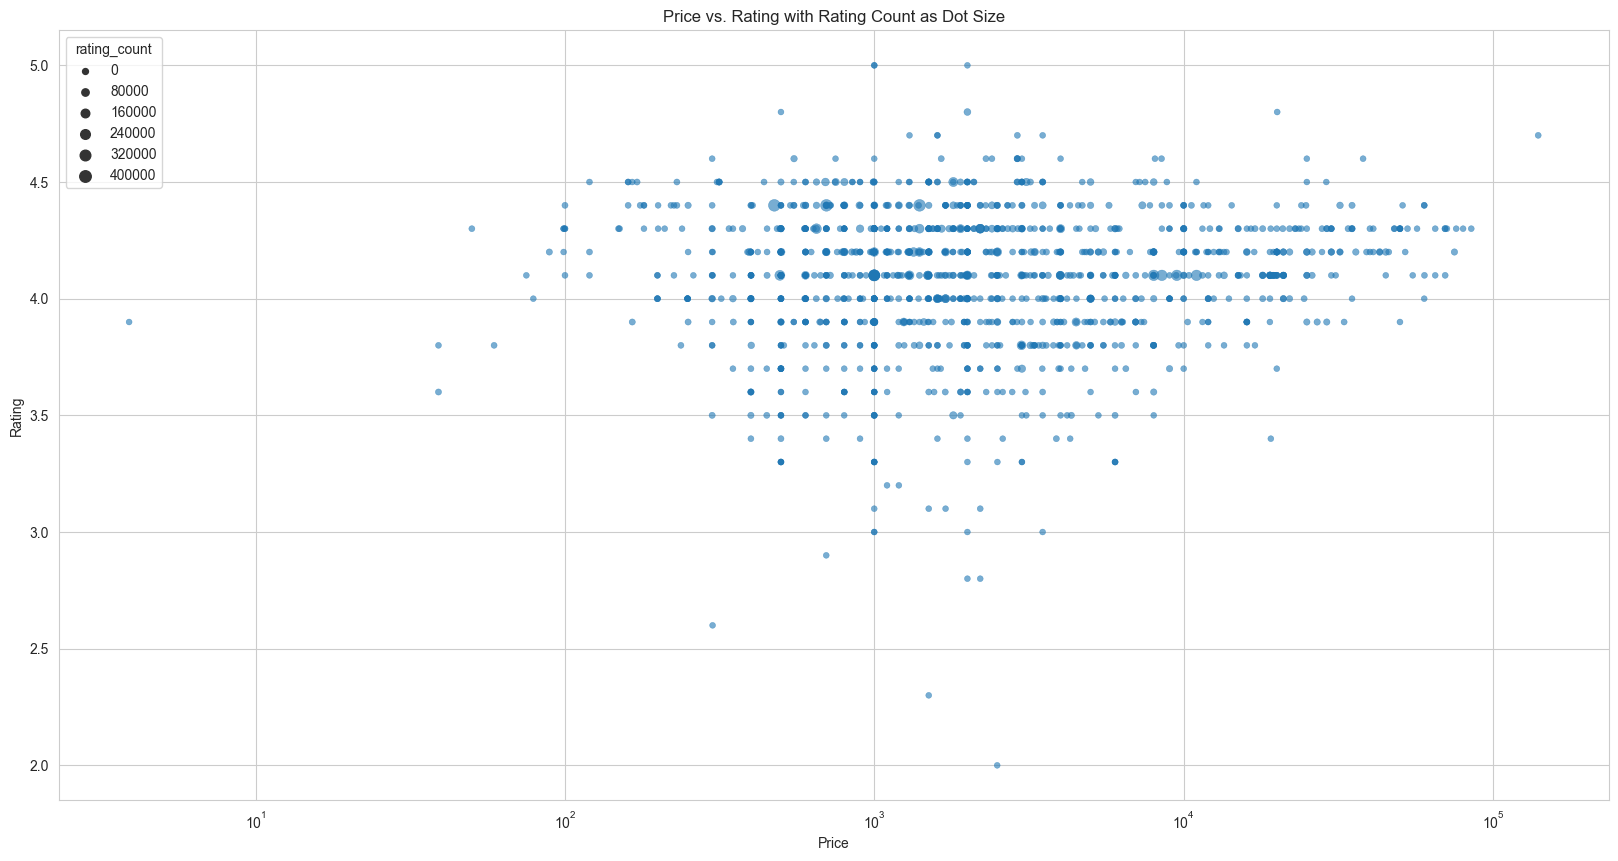

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
# Preparing the size of the dots. We normalize the 'rating_count' to ensure the dot sizes are visually manageable.
# You might need to adjust the scaling factor according to your specific dataset.
#dot_size = amazon_data['rating_count'] / amazon_data['rating_count'].max() * 100  # Normalizing and scaling

sns.scatterplot(x='actual_price', y='rating', size='rating_count', legend=True, data=amazon_data, alpha=0.6, edgecolor=None, palette='coolwarm')
plt.title('Price vs. Rating with Rating Count as Dot Size')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.xscale('log')
# Optional: Adjust x and y axis limits if necessary
# plt.xlim(0, df['actual_price'].max() + 10)
# plt.ylim(0, 5)
plt.show()

One observation that I noitced here that the products or items that are higher priced tend to have higher ratings.

Now lets see what the actual top products are based on rating and rating count

In [29]:
top_products = amazon_data.sort_values(by='rating_count', ascending=False).head(20)
top_products = top_products[['product_name', 'category', 'rating', 'rating_count', 'actual_price']]
top_products.reset_index(drop=True, inplace=True)
top_products

,product_name,category,rating,rating_count,actual_price
0,amazon basics highspeed hdmi cable 6 feet supp...,electronics,4.4,426973.0,475.0
1,amazon basics highspeed hdmi cable 6 feet 2pac...,electronics,4.4,426973.0,1400.0
2,amazonbasics flexible premium hdmi cable black...,electronics,4.4,426972.0,700.0
3,boat bassheads 100 ear wired earphones mictaff...,electronics,4.1,363713.0,999.0
4,boat bassheads 100 ear wired earphones micfuri...,electronics,4.1,363713.0,999.0
5,boat bassheads 100 inear wired headphones mic ...,electronics,4.1,363711.0,999.0
6,redmi 9a sport coral green 2gb ram 32gb storag...,electronics,4.1,313836.0,8499.0
7,redmi 9 activ carbon black 4gb ram 64gb storag...,electronics,4.1,313836.0,10999.0
8,redmi 9a sport carbon black 2gb ram 32gb stora...,electronics,4.1,313832.0,7999.0
9,redmi 9a sport coral green 3gb ram 32gb storag...,electronics,4.1,313832.0,9499.0


As we can see, the top products are with the highest rating_count is electronics, and to my suprise, they are actually not that cheap.

Upon comprehensive examination of the products, encompassing their pricing and ratings, we have arrived at a nuanced understanding of the intricate relationship between these factors. This analysis enables us to discern the potential influence of ratings on pricing strategies, the impact of product categorization on consumer ratings, and the manner in which the category of a product may also sway its price point. This holistic view provides valuable insights into the dynamics of consumer preferences and market trends.

## CREATING DUMMY VALUES

Let's change the category column to dummy variables

In [33]:
#pd.get_dummies("")
amazon_data = pd.get_dummies(amazon_data, columns=["category"], prefix="Category")


In [34]:
amazon_data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,...,Category_39,Category_carmotorbike,Category_computersaccessories,Category_electronics,Category_healthpersonalcare,Category_homeimprovement,Category_homekitchen,Category_musicalinstruments,Category_officeproducts,Category_toysgames
8,B008IFXQFU,tplink usb wifi adapter pctlwn725n n150 wirele...,499.0,999.0,50.0,4.2,179691.0,usb wifi adapter speedy wireless transmission ...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...",...,False,False,True,False,False,False,False,False,False,False
16,B0B6F7LX4C,mi 80 cm 32 inches 5a series hd ready smart an...,13999.0,24999.0,44.0,4.2,32840.0,note brands mi xiaomi part multinational congl...,"AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO...","Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,...",...,False,False,False,True,False,False,False,False,False,False
24,B0B1YVCJ2Y,acer 80 cm 32 inches series hd ready android s...,11499.0,19990.0,42.0,4.3,4703.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHH...","Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...",...,False,False,False,True,False,False,False,False,False,False
26,B08B42LWKN,oneplus 80 cm 32 inches series hd ready led sm...,14999.0,19999.0,25.0,4.2,34899.0,resolution hd ready 1366x768 refresh rate 60 h...,"AFUT7ANZTZYGLXU65EQ2D5OP6UMA,AGT7YYJVUC6ZHRKQH...","ATHARVA BONDRE,Sujitkumar Thorat,Chandrasekara...",...,False,False,False,True,False,False,False,False,False,False
38,B0B3MMYHYW,oneplus 126 cm 50 inches series 4k ultra hd sm...,32999.0,45999.0,28.0,4.2,7298.0,resolution 4k ultra hd 3840x2160 bezelless des...,"AGDOVGWZKEQ3M6DA2GHV6WUZT5SA,AGEUXHN7U2Q26CM6T...","Abhishek Kumar,Arun prasath,Naveen,Harmit,Plac...",...,False,False,False,True,False,False,False,False,False,False


Nice, now that we have the amazon product categories one-hot encoded, let's start standardizing our values